# Importing needed package

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Reading Data 

In [2]:
# Load CSV using Pandas from URL
import pandas
url = "https://raw.githubusercontent.com/user1019/database/master/Regression-Data.tsv"
#names = ['Gene_Profile_Size', 'Taxon_Profile_Size', 'Semantic_similarity']
df = pandas.read_csv(url,  sep='\t')
print(df.shape)
df.head(5)

(21349, 3)


,Gene_Profile_Size,Taxon_Profile_Size,Semantic_similarity
0,15,22,0.096137
1,15,162,0.329889
2,15,157,0.329889
3,15,1029,0.379192
4,15,34,0.065285


# Data Exploration

Lets first have a descriptive exploration on our data.

In [3]:
# summarize the data
df.describe()

,Gene_Profile_Size,Taxon_Profile_Size,Semantic_similarity
count,21349.000000,21349.000000,21349.000000
mean,25.517073,86.331163,0.400730
std,18.741270,179.789270,0.332214
min,3.000000,2.000000,0.000000
25%,11.000000,11.000000,0.103883
50%,23.000000,31.000000,0.361598
75%,32.000000,86.000000,0.602077
max,83.000000,2829.000000,4.853451



Lets select some features to explore more.

In [4]:
cdf = df[['Gene_Profile_Size','Taxon_Profile_Size','Semantic_similarity']]
cdf.head(9)

,Gene_Profile_Size,Taxon_Profile_Size,Semantic_similarity
0,15,22,0.096137
1,15,162,0.329889
2,15,157,0.329889
3,15,1029,0.379192
4,15,34,0.065285
5,15,20,0.065285
6,15,275,0.424140
7,15,27,0.260138
8,15,18,0.034433


we can plot each of these features:

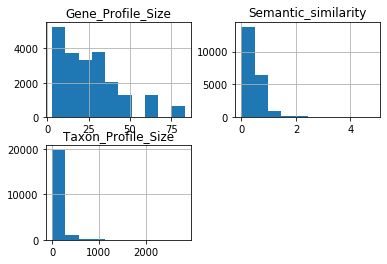

In [5]:
viz = cdf[['Gene_Profile_Size','Taxon_Profile_Size','Semantic_similarity']]
viz.hist()
plt.show()


Now, lets plot each of these features vs the Semantic_Similarity, to see how linear is their relation:

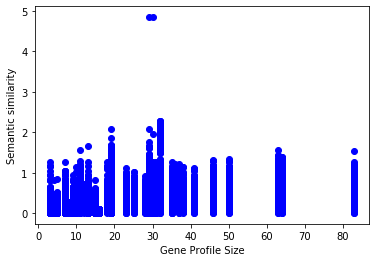

In [6]:
plt.scatter(cdf.Gene_Profile_Size, cdf.Semantic_similarity,  color='blue')
plt.xlabel("Gene Profile Size")
plt.ylabel("Semantic similarity")
plt.show()

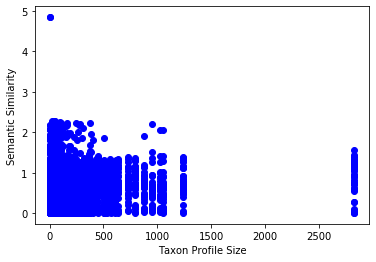

In [7]:
plt.scatter(cdf.Taxon_Profile_Size, cdf.Semantic_similarity,  color='blue')
plt.xlabel("Taxon Profile Size")
plt.ylabel("Semantic Similarity")
plt.show()

# Creating train and test dataset

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Simple Regression Model


Linear Regression fits a linear model with coefficients 𝜃=(𝜃1,...,𝜃𝑛)to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

### Train Data Distribution

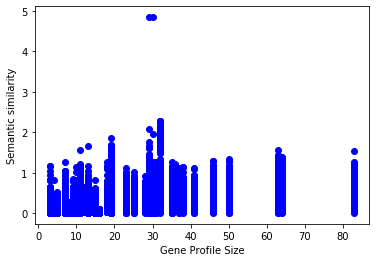

In [9]:
plt.scatter(train.Gene_Profile_Size, train.Semantic_similarity,  color='blue')
plt.xlabel("Gene Profile Size")
plt.ylabel("Semantic similarity")
plt.show()

#### Modeling
Using sklearn package to model data.

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Gene_Profile_Size']])
train_y = np.asanyarray(train[['Semantic_similarity']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00682503]]
Intercept:  [0.22667055]



As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

### Plot outputs



we can plot the fit line over the data:

Text(0, 0.5, 'Semantic Similarity')

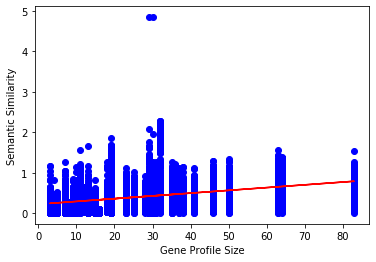

In [11]:
plt.scatter(train.Gene_Profile_Size, train.Semantic_similarity,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Gene Profile Size")
plt.ylabel("Semantic Similarity")

### Evaluation
 
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.


* R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [12]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Gene_Profile_Size']])
test_y = np.asanyarray(test[['Semantic_similarity']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.23
Residual sum of squares (MSE): 0.10
R2-score: -5.10


# Residual Plots 

Residuals are the difference between the dependent variable (y) and the predicted variable (y_predicted).

A residual plot is a scatter plot of the independent variables and the residual. Let’s calculate the residuals and plot them.

Text(0, 0.5, 'Residual')

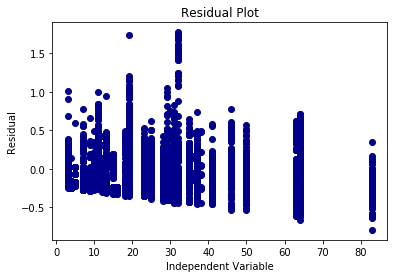

In [13]:
residuals = test_y-test_y_hat
plt.plot(test_x,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")         

### Train Data Distribution for Taxon Profile Size

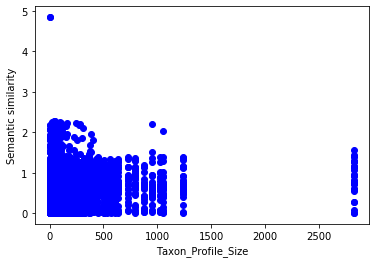

In [14]:
plt.scatter(train.Taxon_Profile_Size, train.Semantic_similarity,  color='blue')
plt.xlabel("Taxon_Profile_Size")
plt.ylabel("Semantic similarity")
plt.show()

# Modeling for Taxon profile size & semantic similarity

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Taxon_Profile_Size']])
train_y = np.asanyarray(train[['Semantic_similarity']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00051154]]
Intercept:  [0.35682987]


Text(0, 0.5, 'Semantic Similarity')

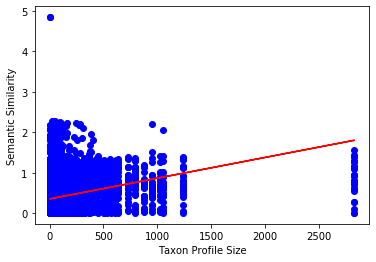

In [16]:
plt.scatter(train.Taxon_Profile_Size, train.Semantic_similarity,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Taxon Profile Size")
plt.ylabel("Semantic Similarity")

## Evaluation

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Taxon_Profile_Size']])
test_y = np.asanyarray(test[['Semantic_similarity']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.24
Residual sum of squares (MSE): 0.10
R2-score: -11.97


## Residual Plot

Text(0, 0.5, 'Residual')

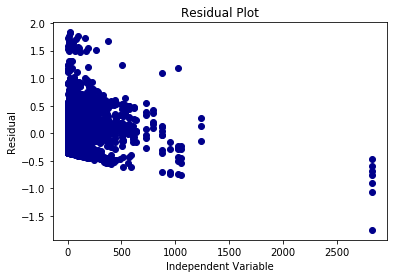

In [18]:
residuals = test_y-test_y_hat
plt.plot(test_x,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")    